In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import matplotlib.image as mpimg
import pylab as pl
%matplotlib inline

In [2]:
image = cv2.imread('train_images/0a4e1a29ffff.png')   # 000c1434d8d7 0a4e1a29ffff 7b87b0015282

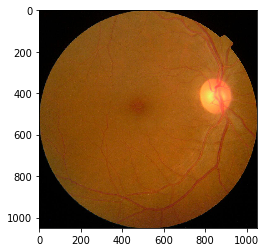

In [3]:
#imgplot = plt.imshow(image)
imgplot = plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

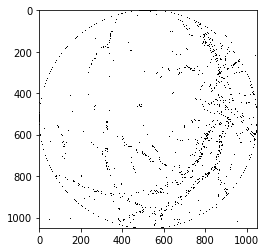

In [4]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

img_gray_blur = cv2.GaussianBlur(img_gray, (5,5), 0)

canny_edges = cv2.Canny(img_gray_blur, 15, 35)    #Vary the parameter for different results

ret, mask = cv2.threshold(canny_edges, 70, 255, cv2.THRESH_BINARY)

imgplot = plt.imshow(mask,cmap='binary',filternorm=1,filterrad=4.0)
#imgplot = plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys
 
def build_filters():
    filters = []
    ksize = 31
    for theta in np.arange(0, np.pi, np.pi / 16):
        kern = cv2.getGaborKernel((ksize, ksize), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
        kern /= 1.5*kern.sum()
        filters.append(kern)
    return filters
 
def process(img, filters):
    accum = np.zeros_like(img)
    for kern in filters:
        fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)
        np.maximum(accum, fimg, accum)
    return accum
 

img_fn = 'train_images/0a4e1a29ffff.png'  #000c1434d8d7 7b87b0015282 0c917c372572

img = cv2.imread(img_fn)
if img is None:
    print ('Failed to load image file:', img_fn)
    sys.exit(1)

filters = build_filters()

#img_converted_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imga = cv2.resize(img, (960, 960)) 
cv2.imshow('original', imga)
#plt.imshow(img)
#plt.show()

res1 = process(img, filters)
resa = cv2.resize(res1, (960, 960)) 
cv2.imshow('result', resa)
#plt.imshow(res1)
#plt.show()

img_gray = cv2.cvtColor(res1, cv2.COLOR_BGR2GRAY)
img_gray_blur = cv2.GaussianBlur(img_gray, (5,5), 0)
canny_edges = cv2.Canny(img_gray_blur, 15, 25)        #change this parameter for ifferent results
ret, mask = cv2.threshold(canny_edges, 70, 255, cv2.THRESH_BINARY_INV)

maska = cv2.resize(mask, (960, 960)) 
cv2.imshow('Mask', maska)
#plt.imshow(mask,cmap='plasma')
#plt.show()


cv2.waitKey(0)
cv2.destroyAllWindows()
for _ in range(0,10):
    cv2.waitKey(1)


In [22]:
image.reshape(-1,1050,1050)
len(image)

1050

In [1]:
#Intensity Thresholding ==> desnt work properly for now
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('train_images/0c917c372572.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

cv2.namedWindow("image", cv2.WINDOW_AUTOSIZE);
cv2.imshow('image', thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()
for _ in range(0,10):
    cv2.waitKey(1)

In [ ]:
#thresholding try 2
import cv2
import matplotlib.pyplot as plt
import numpy as np

max_value = 255
max_type = 4
max_binary_value = 255
trackbar_type = 'Type: \n 0: Binary \n 1: Binary Inverted \n 2: Truncate \n 3: To Zero \n 4: To Zero Inverted'
trackbar_value = 'Value'
window_name = 'Threshold Demo'
 
src = cv2.imread('train_images/0a38b552372d.png')    #3b73a3a4a734 0c917c372572 0a38b552372d 0a4e1a29ffff
#convert to gray
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
# Create a window to display results
cv2.namedWindow(window_name)

def Threshold_Demo(val):
    #0: Binary
    #1: Binary Inverted
    #2: Threshold Truncated
    #3: Threshold to Zero
    #4: Threshold to Zero Inverted
    threshold_type = cv2.getTrackbarPos(trackbar_type, window_name)
    threshold_value = cv2.getTrackbarPos(trackbar_value, window_name)
    _, dst = cv2.threshold(src_gray, threshold_value, max_binary_value, threshold_type )
    dst = cv2.resize(dst, (800, 750)) 
    cv2.imshow(window_name, dst)
    
# Create Trackbar to choose type of Threshold
cv2.createTrackbar(trackbar_type, window_name , 3, max_type, Threshold_Demo)
# Create Trackbar to choose Threshold value
cv2.createTrackbar(trackbar_value, window_name , 0, max_value, Threshold_Demo)
    
# Call the function to initialize
Threshold_Demo(0)
# Wait until user finishes program
cv2.waitKey(0)
cv2.destroyAllWindows()
for _ in range(0,10):
    cv2.waitKey(1)

In [10]:
cv2.imshow("1",mask)
cv2.waitKey(0)
cv2.destroyAllWindows()
#for _ in range(0,10):
#    cv2.waitKey(1)

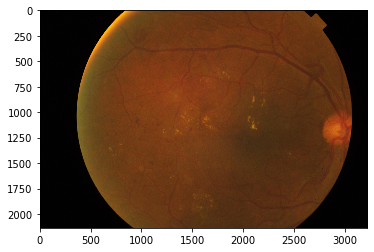

In [3]:
import matplotlib.image as mpimg
img=mpimg.imread('train_images/000c1434d8d7.png')
imgplot = plt.imshow(img)
plt.show()

In [4]:
train = pd.read_csv('train.csv')

In [5]:
train.head(10)

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0
5,0083ee8054ee,4
6,0097f532ac9f,0
7,00a8624548a9,2
8,00b74780d31d,2
9,00cb6555d108,1


In [2]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']